In [114]:
%matplotlib inline
import matplotlib.pyplot as plt    # for plotting 
import math as mt
import random
import numpy as np  
import statistics as st
import seaborn as sns

def get_input(input_message,warnging_message):
    while True:
        try:
            value = int(input(input_message))
            if value <=0: 
                print(warnging_message)
                continue
        except ValueError:
            print(warnging_message)
            continue
        break
    return int(value)
    
class CLT:

    def __init__(self):

        
        self.number_of_tosses=0
        self.size_of_sample = 0
        self.number_of_samples= 0
        self.tosses=[]
        self.samples=[]
    

        self.set_number_of_tosses()
        self.set_size_of_sample()
        self.set_number_of_samples()
        self.simulate_tosses()
        self.simulate_Dice_tosses()
        self.simulate_samples()
        
    def set_number_of_tosses(self):
        input_message="Enter the number of tosses you would like to be performed: "
        warnging_message="that's not a valid number of tosses. Try again \n"
        self.number_of_tosses=get_input(input_message,warnging_message)
    
    def set_size_of_sample(self):
        input_message="Enter the size of sample you would like to be taken: "
        warnging_message="that's not a valid size of samples. Try again \n"
        self.size_of_sample=get_input(input_message,warnging_message)
        while  self.size_of_sample > self.number_of_tosses:
            print("Size of sample should be strictly lower than the number of tosses\n")
            self.size_of_sample=get_input(input_message,warnging_message)
        
    def set_number_of_samples(self):
        input_message="Enter the number of samples you would like to be taken: "
        warnging_message="that's not a valid number of samples. Try again \n"
        self.number_of_samples=get_input(input_message,warnging_message)
    
    def simulate_tosses(self):
        random.seed=5
        self.tosses= [random.uniform(0, 1) for i in range(self.number_of_tosses)]
    
    def simulate_samples(self):
        random.seed=5
        self.samples=[st.mean(random.sample(self.tosses, self.size_of_sample))
                      for i in range(self.number_of_samples)]
    def simulate_Dice_tosses(self):
        random.seed=5
        self.tosses= [random.uniform(0, 6)for i in range(self.number_of_tosses)]
        
    def displaySamples(self):
        set_of_point = np.asarray(self.samples)
        num_bins =round(1+ mt.log2(self.number_of_samples))
        fig = plt.figure(figsize=(12, 8)) 
        ax1 = fig.add_subplot(1, 2, 1)
        ax1= sns.histplot(set_of_point, bins=num_bins,kde=True)
        ax1.lines[0].set_color('crimson')
        plt.show()
        
    def showInAction(self):
        num_bins =round(1+ mt.log2(self.number_of_samples))
        fig1 = plt.figure(figsize=(12, 8))
        ax1 = fig1.add_subplot(2, 2, 1)  # add an Axes called ax1
        fig2 = plt.figure(figsize=(12, 8))
        ax2 = fig2.add_subplot(2, 2, 2)  # add an Axes called ax2
        fig3 = plt.figure(figsize=(12, 8))
        ax3 = fig3.add_subplot(2, 2, 3)  # add an Axes called ax3
        fig4 = plt.figure(figsize=(12, 8))
        ax4 = fig4.add_subplot(2, 2, 4)
        test_Sizes= np.array([self.samples])
        original_samples_size=self.number_of_samples
        
 
        self.number_of_samples=self.number_of_samples*2
   
        set_of_point = np.asarray([st.mean(random.sample(self.tosses, self.size_of_sample))
                  for i in range(self.number_of_samples)])
        sns.histplot(set_of_point, bins=num_bins,ax=ax1,kde=True)
        ax1.lines[0].set_color('crimson')
        ax1.set_xlabel("Samples", fontsize = 20)
        ax1.set_ylabel("Frequency", fontsize = 20)
        ax1.set_title("title",fontsize = 20)
    
        self.number_of_samples=self.number_of_samples*4
        set_of_point = np.asarray([st.mean(random.sample(self.tosses, self.size_of_sample))
                  for i in range(self.number_of_samples)])
        sns.histplot(set_of_point, bins=num_bins,ax=ax2,kde=True)


        self.number_of_samples=self.number_of_samples*6
        set_of_point = np.asarray([st.mean(random.sample(self.tosses, self.size_of_sample))
                  for i in range(self.number_of_samples)])
        sns.histplot(set_of_point, bins=num_bins,ax=ax3,kde=True)
        
        self.number_of_samples=self.number_of_samples*18
        set_of_point = np.asarray([st.mean(random.sample(self.tosses, self.size_of_sample))
                  for i in range(self.number_of_samples)])
        sns.histplot(set_of_point, bins=num_bins,ax=ax4,kde=True)
      
       
        plt.show()
        self.number_of_samples=original_samples_size
        
                              


        
        



Enter the number of tosses you would like to be performed: 10000
Enter the size of sample you would like to be taken: 23
Enter the number of samples you would like to be taken: 300


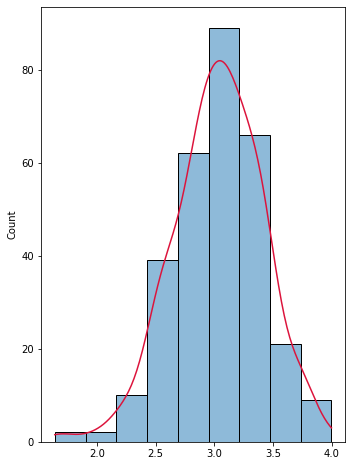

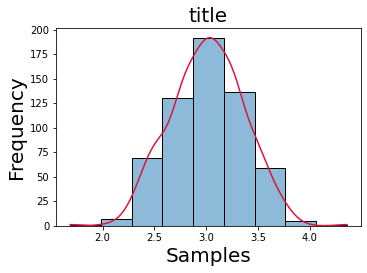

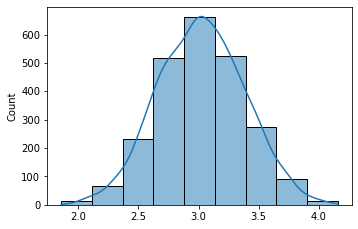

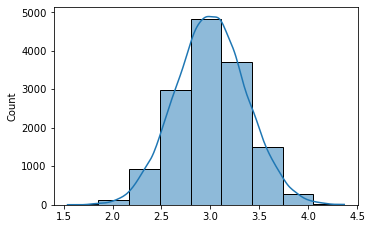

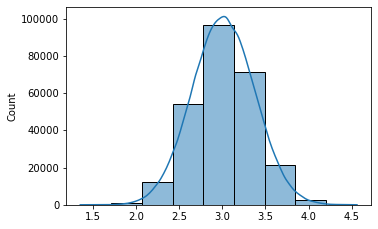

In [115]:
if __name__ == '__main__':
    model = CLT()
    model.samples
    model.displaySamples()
    model.showInAction()